In [6]:
from read_data import *
from hyper import *
from alignment import *
from copy import *
from datasets.preprecossing import *
import rpy2

folder_path = './datas/720/'
pcanum = 20

In [13]:
datas.to_df()

,NOC2L,HES4,ISG15,AGRN,C1orf159,SDF4,B3GALT6,UBE2J2,ACAP3,PUSL1,...,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC007325.4
AAACAAGTATCTCCCA-1.1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,72.0,97.0,38.0,1.0,62.0,5.0,0.0,47.0,0.0
AAACAATCTACTAGCA-1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,15.0,16.0,10.0,2.0,14.0,3.0,0.0,7.0,0.0
AAACACCAATAACTGC-1.1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,12.0,25.0,3.0,0.0,23.0,2.0,0.0,5.0,0.0
AAACAGAGCGACTCCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,38.0,35.0,15.0,3.0,28.0,5.0,0.0,20.0,0.0
AAACAGCTTTCAGAAG-1.1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.0,65.0,77.0,27.0,2.0,51.0,10.0,0.0,42.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTTCACATCCAGG-1.1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,46.0,64.0,23.0,1.0,40.0,4.0,0.0,27.0,0.0
TTGTTTCATTAGTCTA-1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,9.0,1.0,0.0,5.0,1.0,0.0,3.0,0.0
TTGTTTCCATACAACT-1.1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,70.0,95.0,46.0,3.0,67.0,5.0,0.0,51.0,0.0
TTGTTTGTATTACACG-1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,15.0,19.0,10.0,3.0,19.0,2.0,0.0,11.0,0.0


In [8]:
datas = sc.read_h5ad("./datas/nature/151508_preprocessed.h5")
count_sub = datas.to_df()
xy_coords = datas.obs[['imagerow',"imagecol"]]
xy_coords.to_csv(folder_path+"xy.csv")
datas.obs.to_csv(folder_path+'meta_data.csv');
count_sub.T.to_csv(folder_path+"gene.csv")

In [17]:
("count_temp <- read.csv('{}',row.names='X')".format(folder_path + 'gene.csv'))


"count_temp <- read.csv('./datas/720/gene.csv',row.names='X')"

In [18]:
# robjects.r("load(paste0('./datas/pca/DLPFC/LIBD_sample1.RData'))")
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects

Spatialpc  = importr('SpatialPCA')
ggplot2 = importr('ggplot2')
matrix = importr('Matrix')
robjects.r("xy_coords <- read.csv('{}',row.names='X')".format(folder_path + 'xy.csv'))
robjects.r("xy_coords=as.matrix(xy_coords)")
robjects.r("count_temp <- read.csv('{}',row.names='X')".format(folder_path + 'gene.csv'))
robjects.r('my_matrix <- do.call(cbind, count_temp)')
robjects.r('my_sparse_matrix <- Matrix(my_matrix, sparse = TRUE)')
robjects.r('count_sub <- as(my_sparse_matrix, "dgCMatrix")')
robjects.r('rownames(count_sub) <- rownames(count_temp)')
robjects.r("rownames(xy_coords) = colnames(count_sub)");
robjects.r('LIBD = CreateSpatialPCAObject(counts=count_sub, location=xy_coords, project = "SpatialPCA",gene.type="spatial",sparkversion="spark",numCores_spark=5,gene.number=3000, customGenelist=NULL,min.loctions = 20, min.features=20)')
robjects.r('LIBD = SpatialPCA_buildKernel(LIBD, kerneltype="gaussian", bandwidthtype="SJ",bandwidth.set.by.user=NULL)')
robjects.r('LIBD = SpatialPCA_EstimateLoading(LIBD,fast=FALSE,SpatialPCnum={})'.format(pcanum))
robjects.r('LIBD = SpatialPCA_SpatialPCs(LIBD, fast=FALSE)')
robjects.r('write.csv(as.data.frame(LIBD@SpatialPCs), file = "{}")'.format(folder_path + "pca.csv"))

## Use SCTransform function in Seurat to normalize data. 


R[write to console]: Calculating cell attributes from input UMI matrix: log_umi

R[write to console]: Variance stabilizing transformation of count matrix of size 9256 by 4379

R[write to console]: Model formula is y ~ log_umi

R[write to console]: Get Negative Binomial regression parameters per gene

R[write to console]: Using 2000 genes, 4379 cells



  |======================================================================| 100%


R[write to console]: Found 44 outliers - those will be ignored in fitting/regularization step


R[write to console]: Second step: Get residuals using fitted parameters for 9256 genes



  |======================================================================| 100%


R[write to console]: Computing corrected count matrix for 9256 genes



  |======================================================================| 100%


R[write to console]: Calculating gene attributes

R[write to console]: Wall clock passed: Time difference of 48.94997 secs

R[write to console]: Determine variable features

R[write to console]: Place corrected count matrix in counts slot

R[write to console]: Centering data matrix

  |                                                                            
  |                                                                      |   0%
  |                                                                            
  |=====                                                                 |   8%
  |                                                                            
  |===========                                                           |  15%
  |                                                                            
  |================                                                      |  23%
  |                                                                         

## Use spark.test function in SPARK package to select spatially variable genes. 
## ===== SPARK INPUT INFORMATION ==== 
## number of total samples:  4379 
## number of total features:  3228 
## number of adjusted covariates:  0 
# fitting normalized count-based spatial model under the null hypothesis ... 
## testing Gaussian kernel: 1...
## testing Periodic kernel: 1...
## testing Gaussian kernel: 2...
## testing Periodic kernel: 2...
## testing Gaussian kernel: 3...
## testing Periodic kernel: 3...
## testing Gaussian kernel: 4...
## testing Periodic kernel: 4...
## testing Gaussian kernel: 5...
## testing Periodic kernel: 5...
## Identified  1296  spatial genes through spark.test function. 
The  number of significant spatial genes is less than the specified number of spatial genes. 
## Using  1296  significant spatially variable genes. 
## Selected kernel type is:  gaussian  
## The bandwidth is:  0.0371159794314493  
## Calculating kernel matrix
## Finished calculating kernel matrix

In [16]:
folder_path

'./datas/720/'

In [19]:
adata1 = pd.read_csv(folder_path+"pca.csv")
adata1 = adata1.set_index(adata1.columns[0]).T
adata1.index = adata1.index.str.replace('.', '-')
adata1 = anndata.AnnData(adata1)

cell_meta = pd.read_csv(folder_path+"meta_data.csv")
cell_meta = cell_meta.set_index(cell_meta.columns[0])
adata1.obs = cell_meta
adata1.obsm['X_pca'] = adata1.to_df()
# # adata1.obs['celltype'] = cell_meta.values




/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_82249/953224956.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  adata1.index = adata1.index.str.replace('.', '-')
/var/folders/bm/69jvgsdj3rxch558kx9yp9y00000gn/T/ipykernel_82249/953224956.py:4: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata1 = anndata.AnnData(adata1)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [20]:
adata1.raw = adata1

sc.pp.neighbors(adata1,
                n_neighbors=10,
                use_rep='X_pca',
                random_state=1234
                )
sc.tl.diffmap(adata1,random_state=1234)
sc.tl.umap(adata1,random_state=1234)
sc.tl.leiden(adata1,random_state=1234,resolution = 0.5)
sc.tl.paga(adata1, groups='leiden')


In [21]:
set_initial_condition(adata1);


In [22]:
inter_gene = sort_data(adata1,adata1)

20 genes are used to calculate cost of tree alignment.



In [23]:
calculate_cluster_centroid_for_genes

<function datasets.preprecossing.calculate_cluster_centroid_for_genes(adata, gene_list, save_path='./')>

In [24]:
tmp1 = calculate_cluster_centroid_for_genes(adata1,inter_gene,folder_path)
tmp1

Unnamed: 0,16,10,20,5,9,13,14,18,17,15,8,11,12,7,6,19,3,2,1,4
0,0.011202,0.754721,0.074122,-1.031689,-0.164856,0.083059,-0.081163,-0.056505,0.130311,-0.264083,-0.253328,0.068263,-0.054196,0.528014,1.203577,-0.176095,-1.066218,-3.618390,3.994432,0.909672
1,-0.145663,-0.878809,0.342847,-1.065515,-0.507694,0.054281,0.263845,0.481232,0.650813,-0.078893,0.611051,-0.134416,-0.006213,-1.080743,0.841362,-0.163036,-1.380248,1.761021,-1.891118,0.781205
2,-0.005580,0.068470,-0.262581,1.486534,-0.397863,0.398730,0.384174,0.030207,0.021607,-0.095922,0.118491,0.071406,0.093772,-0.298183,0.785979,0.285069,0.296718,-2.520323,-3.080252,0.450014
3,-0.047778,1.243382,0.046195,0.853186,-0.164652,0.117634,-0.159300,0.150307,0.104978,-0.411922,0.029230,0.565272,0.185217,0.723219,-1.089040,-0.162423,-1.481340,0.738054,-3.819408,-0.998916
4,0.169561,-0.018119,-0.108848,2.136944,-0.455476,-0.107615,0.299235,-0.283424,-0.068210,-0.332664,-0.235921,0.255149,0.139510,-0.072788,-0.098372,0.182267,0.609097,6.073748,6.974452,1.686887
5,-0.002128,-0.487011,-0.129816,-0.895467,-0.039296,-0.477765,0.355602,0.282845,-0.088510,-0.091144,0.633227,-0.484136,-0.097048,0.551044,-1.248747,0.193584,-1.104181,-4.154096,5.836175,-0.890764
6,0.035929,-0.159766,-0.355438,1.032177,1.010278,0.047544,0.088596,0.000510,-0.542988,0.089888,0.791791,-0.474537,0.273199,-1.103880,1.085737,0.126335,-0.885421,-1.184988,-3.000092,0.213228
7,0.280067,0.320364,-0.336291,-1.693845,0.137021,0.016777,0.004260,0.103051,-0.226721,-0.131402,0.012182,0.344540,-0.597554,-0.680994,-0.275865,-0.287885,0.889497,4.340611,0.266920,-1.256680
8,-0.467231,-1.150605,-0.065139,0.263522,-0.249832,0.447208,-0.435759,0.005231,0.445299,0.436620,-0.717581,0.198737,0.413283,0.013674,-0.778165,0.001793,1.735900,-2.459229,1.547431,-1.705387
9,0.171393,-0.050100,-0.083877,1.224007,-0.517013,-0.593772,-0.441359,0.259976,0.392516,-0.210845,-0.768477,-0.393285,0.046212,0.380721,0.627790,-0.219717,-2.448233,0.294004,-3.626264,-0.162397


./datas/720/datas.data length:16
Generating all pairs superset


  0%|          | 0/1563 [00:00<?, ?ex/s]

100%|██████████| 1563/1563 [01:07<00:00, 23.08ex/s, loss=0.813508] 


	 Epoch 9 | average train loss: 0.861600
Optimization finished.


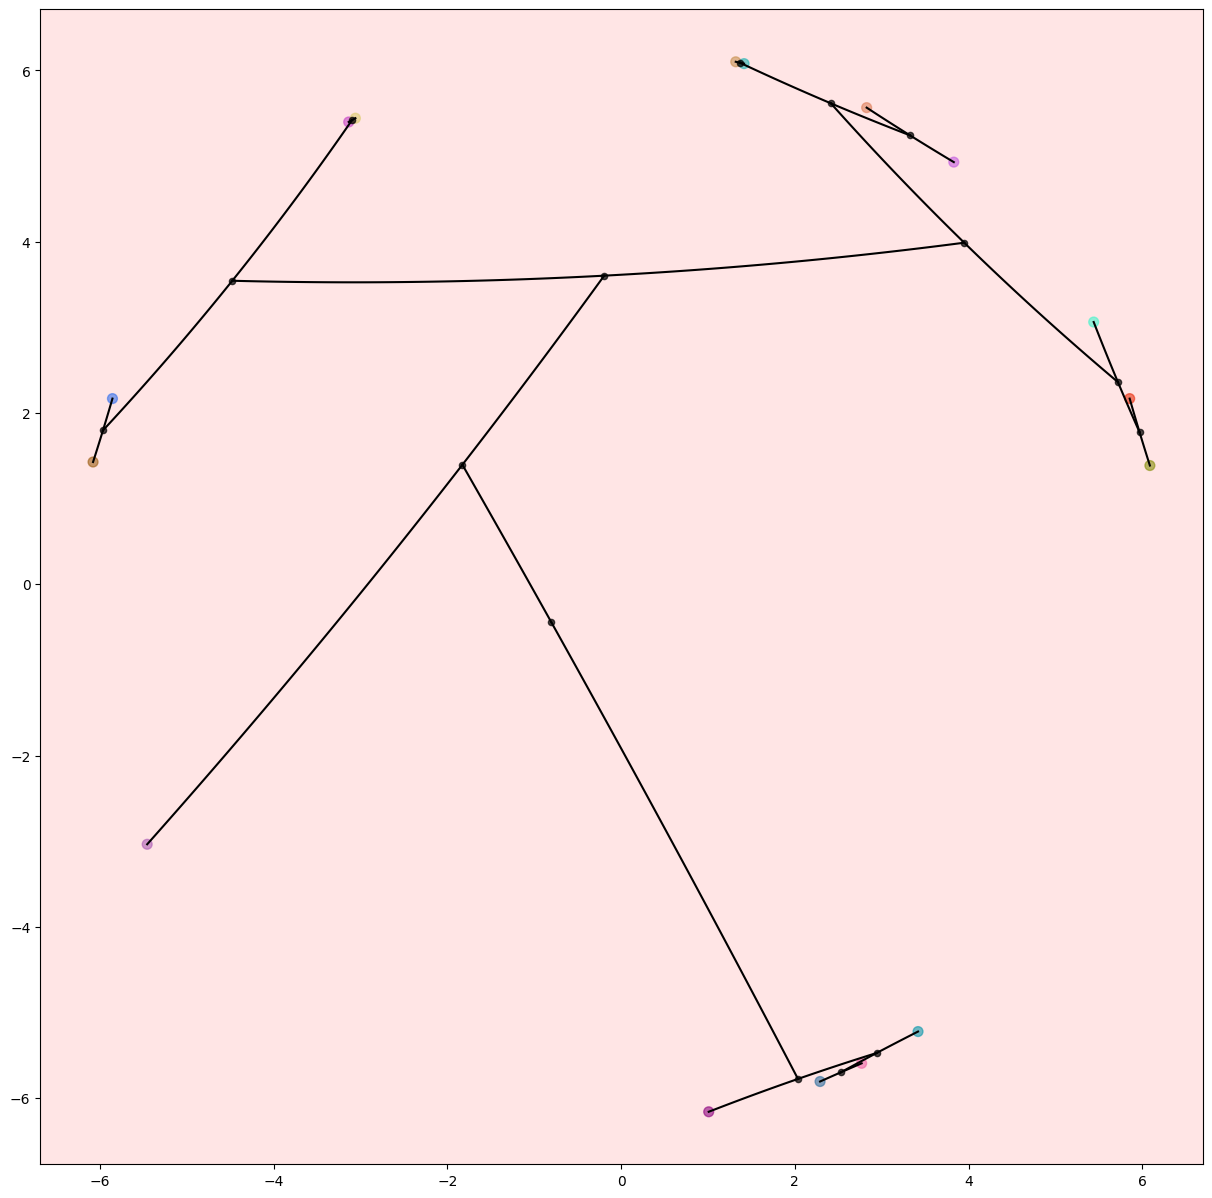

In [25]:
get_Hyper_tree(folder_path+'datas.data',1,tmp1.shape[1]+1,0,10,model_path=None,save_path=folder_path,c=0)


In [ ]:
adata1.obs['leiden']

Unnamed: 0
AAACAACGAATAGTTC-1    8
AAACAAGTATCTCCCA-1    9
AAACAATCTACTAGCA-1    4
AAACACCAATAACTGC-1    3
AAACAGCTTTCAGAAG-1    7
                     ..
TTGTTGTGTGTCAAGA-1    0
TTGTTTCACATCCAGG-1    3
TTGTTTCATTAGTCTA-1    3
TTGTTTCCATACAACT-1    1
TTGTTTGTGTAAATTC-1    4
Name: leiden, Length: 4220, dtype: category
Categories (14, object): ['0', '1', '2', '3', ..., '10', '11', '12', '13']

In [37]:
preprocessing_st_cluster(datas)
# set_initial_condition(datas)



         Falling back to preprocessing with `sc.pp.pca` and default params.


In [46]:
datas.obsm['X_pca'].shape

(4220, 50)

In [9]:
datas.obs

,in_tissue,array_row,array_col,imagerow,imagecol,sum_umi,sum_gene,subject,position,replicate,...,layer_guess_reordered_short,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_counts
AAACAACGAATAGTTC-1,1,0,16,113.141318,147.434749,948,727,Br5292,0,1,...,L1,727,6.590301,948.0,6.855409,22.362869,32.911392,44.409283,76.054852,914.0
AAACAAGTATCTCCCA-1,1,50,102,383.438357,413.051319,4261,2170,Br5292,0,1,...,L3,2170,7.682943,4261.0,8.357493,24.994133,31.471486,40.154893,56.817648,4166.0
AAACAATCTACTAGCA-1,1,3,43,129.522957,231.008109,1969,1093,Br5292,0,1,...,L1,1093,6.997596,1969.0,7.585789,34.128999,42.001016,52.158456,69.883189,1904.0
AAACACCAATAACTGC-1,1,59,19,431.188134,155.805586,3368,1896,Br5292,0,1,...,WM,1896,7.548029,3368.0,8.122372,22.446556,29.928741,39.994062,58.491686,3229.0
AAACAGCTTTCAGAAG-1,1,43,9,344.869499,125.067511,2981,1620,Br5292,0,1,...,L6,1620,7.390799,2981.0,8.000349,27.172090,34.149614,44.112714,62.428715,2909.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTGTGTGTCAAGA-1,1,31,77,280.783088,335.913603,2337,1320,Br5292,0,1,...,L3,1320,7.186144,2337.0,7.757051,30.851519,38.040223,47.411211,64.912281,2286.0
TTGTTTCACATCCAGG-1,1,58,42,426.012616,227.047713,2331,1444,Br5292,0,1,...,L6,1444,7.275865,2331.0,7.754481,22.779923,30.072930,40.669241,59.502360,2267.0
TTGTTTCATTAGTCTA-1,1,60,30,436.678683,189.828989,819,629,Br5292,0,1,...,WM,629,6.445720,819.0,6.709304,25.030525,35.409035,47.619048,84.249084,784.0
TTGTTTCCATACAACT-1,1,45,27,355.805593,180.783085,3092,1697,Br5292,0,1,...,L6,1697,7.437206,3092.0,8.036897,25.582147,32.794308,42.658473,61.287193,3015.0


In [5]:
test =  pd.read_csv('./datas/719/pca.csv')
test = test.set_index(test.columns[0])
test

,AAACAACGAATAGTTC.1,AAACAAGTATCTCCCA.1,AAACAATCTACTAGCA.1,AAACACCAATAACTGC.1,AAACAGCTTTCAGAAG.1,AAACAGGGTCTATATT.1,AAACAGTGTTCCTGGG.1,AAACATTTCCCGGATT.1,AAACCACTACACAGAT.1,AAACCCGAACGAAATC.1,...,TTGTGTATGCCACCAA.1,TTGTGTTTCCCGAAAG.1,TTGTTAGCAAATTCGA.1,TTGTTCAGTGTGCTAC.1,TTGTTCTAGATACGCT.1,TTGTTGTGTGTCAAGA.1,TTGTTTCACATCCAGG.1,TTGTTTCATTAGTCTA.1,TTGTTTCCATACAACT.1,TTGTTTGTGTAAATTC.1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,-1.742179,4.208592,-8.122478,-15.563433,2.585480,-0.571400,-4.745038,1.989525,4.170938,2.596544,...,1.601800,3.069908,3.371156,3.153809,0.210978,3.602209,-0.240509,-10.261098,1.487125,-4.602841
2,-0.050372,-0.188750,8.238340,-8.868978,-1.649134,-2.296564,-4.615797,-3.802923,4.961100,1.048257,...,-3.100365,-4.016083,1.147432,2.833683,-2.487486,2.274316,-3.556936,-7.747452,-2.249188,6.964852
3,0.172844,-0.850747,-2.817448,5.220857,-0.027134,1.547148,0.705489,-1.896522,3.747851,-0.011553,...,-0.823501,-0.971786,0.185960,1.740142,-1.298287,0.859793,1.898851,1.222923,-0.216891,-1.650097
4,2.192438,-0.732998,-3.844993,-4.435772,-0.087575,0.318647,-0.741601,2.685640,0.726184,1.815685,...,-0.876923,-0.442207,-2.325353,-0.456158,1.443258,-1.887574,-0.375175,2.723484,-0.783052,-2.024797
5,-0.777553,1.336927,-1.577289,2.248321,-3.085096,-2.976059,-0.005429,-0.696005,0.332314,1.767681,...,-1.941323,-1.270356,1.915761,0.838848,-0.092483,1.028837,-2.388757,2.947516,-1.696337,-0.920072
6,-4.132174,1.366941,-0.367433,1.530303,-1.255844,-0.580191,-0.992041,2.105831,1.580622,2.309779,...,1.348670,1.146837,0.326176,0.435541,-2.056775,0.160600,0.033545,-2.285964,-0.783625,-0.299170
7,1.636083,1.130777,-0.526728,-0.325219,1.381870,0.562941,-0.268462,-1.688192,-1.313471,1.031371,...,-1.471882,-1.323629,-0.014936,0.389861,2.197608,-0.779891,-0.173732,-0.099366,-1.163087,-2.350509
8,1.739748,-0.353206,0.374770,-1.786930,-1.967390,-1.827987,1.113099,-0.393713,-1.294134,-1.056978,...,1.341084,0.830147,-0.017597,0.002471,-0.872782,0.649933,1.782998,1.651121,-0.376955,-0.495665
9,0.270036,-0.060463,1.681578,-0.099736,-3.015521,-2.413598,0.336453,0.352749,1.674870,-0.029065,...,-0.284918,-0.006385,-0.070385,-0.973102,0.627318,0.058348,-1.256519,-2.607931,0.232594,-0.056054


In [ ]:
get_Hyper_tree()